## Mueller potential
All the postprocessing is done with shell and python scripts.
This notebook can be used to produce the figures of the paper.

In [1]:
root_path = '~/local/OPES-explore/mueller/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# if pandas is available use it to load files, since it is much faster
try:
    import pandas
    def loadfile(fname, unpack=False, delimiter='\s+', comment='#', dtype=float, skiprows=None, usecols=None):
        data = pandas.read_table(fname, header=None, sep=delimiter, comment=comment, dtype=dtype, skiprows=skiprows, usecols=usecols).to_numpy()
        if unpack == True:
            return (data[:,i] for i in range(data.shape[-1]))
        else:
            return data
except:
    print('+++ pandas not found: loading files will be slower +++')
    loadfile = np.loadtxt

In [3]:
#set bigger font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)   # fontsize of the figure title

In [4]:
#set palette
try:
    import fessa
    plt.set_cmap('fessa')
except:
    pass

#palette taken from google slides colours
d_red="#cc0000"    #dark red 1
d_blue="#3C78D8"   #dark cornflower blue 1
d_green="#6AA84F"  #dark green 1
d_orange="#E69138" #dark orange 1
d_purple="#674EA7" #dark purple 1

l_red="#e06666"    #light red 1
l_blue="#6d9eeb"   #light cornflower blue 1
l_green="#93c47d"  #light green 1
l_orange="#f6b26b" #light orange 1
l_purple="#8e7cc3" #light purple 1

<Figure size 432x288 with 0 Axes>

In [5]:
def get_label_color(method):
    if method == 'opes':
        return 'OPES', d_orange
    elif method == 'explore':
        return 'OPES EXPLORE', d_purple
    elif method == 'metad':
        return 'METAD', d_green
    elif method == 'static':
        return 'STATIC', d_blue
    else:
        assert False, "unknown method: "+method

In [6]:
def Mueller(x, y, scale=0.15):
    a = -200*np.exp(-(x-1)**2-10*y**2)
    b = -100*np.exp(-x**2-10*(y-0.5)**2)
    c = -170*np.exp(-6.5*(0.5+x)**2+11*(x+0.5)*(y-1.5)-6.5*(y-1.5)**2)
    d =   15*np.exp(0.7*(1+x)**2+0.6*(x+1)*(y-1)+0.7*(y-1)**2)
    shift = 146.7
    return scale*(a+b+c+d+shift)

In [7]:
nbins = 101
x_bins = np.linspace(-1.3, 1.0, nbins)
y_bins = np.linspace(-0.2, 2.0, nbins)
X, Y = np.meshgrid(x_bins,y_bins)

FES = np.zeros(len(x_bins))
for i,x in enumerate(x_bins):
    FES[i] = -np.logaddexp.reduce(-np.array([Mueller(x,y) for y in y_bins]))
FES -= min(FES)

DeltaF_2D = np.logaddexp.reduce(-Mueller(X,Y)[Y>X+1.3])-np.logaddexp.reduce(-Mueller(X,Y)[Y<X+1.3])
print(f'DeltaF_2D = {DeltaF_2D:g}')
DeltaF_1D = np.logaddexp.reduce(-FES[x_bins<0])-np.logaddexp.reduce(-FES[x_bins>0])
print(f'DeltaF_1D = {DeltaF_1D:g}')

DeltaF_2D = 5.69051
DeltaF_1D = 5.71254


In [8]:
# biased models    
def biasedMueller(x, y, bias, x_bins=x_bins):
    return Mueller(x, y) + np.interp(x, x_bins, bias)
gamma = 20
bias = - (1 - 1 / gamma) * FES

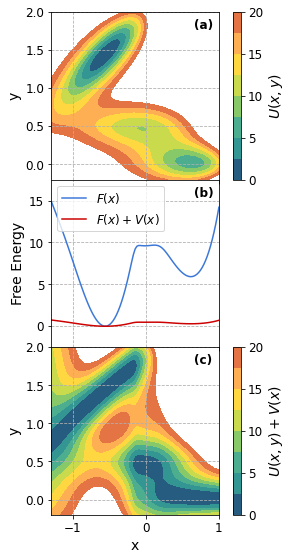

In [9]:
levels = np.linspace(0,20,9)

fig = plt.figure()
fig.set_size_inches((5, 9.25))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

ct0 = axs[0].contourf(X, Y, Mueller(X,Y), levels=levels)
cb0 = plt.colorbar(ct0, ticks=levels[::2], ax=axs[0])
cb0.set_label('$U(x,y)$')
axs[0].set_box_aspect(1)
axs[0].set_xlim(x_bins[0], x_bins[-1])
axs[0].set_ylim(y_bins[0], y_bins[-1])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_yticks(np.arange(0,2.1,.5))
axs[0].grid(linestyle='dashed')
axs[0].text(0.85, 0.9, '(a)', fontweight='bold', transform=axs[0].transAxes)

axs[1].plot(x_bins, FES, c=d_blue, label='$F(x)$')
axs[1].plot(x_bins, FES/gamma, c=d_red, label='$F(x) + V(x)$')
axs[1].set_box_aspect(1)
axs[1].set_xlim(x_bins[0], x_bins[-1])
axs[1].set_ylim(-2.5, 17.5)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Free Energy')
axs[1].legend(loc='upper left')
axs[1].grid(linestyle='dashed')
axs[1].text(0.85, 0.9, '(b)', fontweight='bold', transform=axs[1].transAxes)

ct2 = axs[2].contourf(X, Y, biasedMueller(X,Y,bias), levels=levels)
cb2 = plt.colorbar(ct2, ticks=levels[::2], ax=axs[2])
cb2.set_label('$U(x,y) + V(x)$')
axs[2].set_box_aspect(1)
axs[2].set_xlim(x_bins[0], x_bins[-1])
axs[2].set_ylim(y_bins[0], y_bins[-1])
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_yticks(np.arange(0,2.1,.5))
axs[2].grid(linestyle='dashed')
axs[2].text(0.85, 0.9, '(c)', fontweight='bold', transform=axs[2].transAxes)

plt.savefig('Mueller-potential.pdf', bbox_inches='tight')
plt.show()


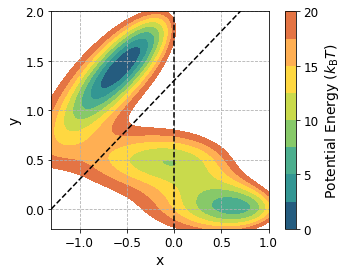

In [10]:
fig, ax = plt.subplots()
ct0 = ax.contourf(X, Y, Mueller(X,Y), levels=levels)
cb0 = plt.colorbar(ct0, ticks=levels[::2], ax=ax)
cb0.set_label('Potential Energy ($k_\mathrm{B}T$)')
ax.set_box_aspect(1)
ax.set_xlim(x_bins[0], x_bins[-1])
ax.set_ylim(y_bins[0], y_bins[-1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_yticks(np.arange(0,2.1,.5))
ax.plot(x_bins, x_bins+1.3, c='black', linestyle='dashed')
plt.axvline(0, c='black', linestyle='dashed')
ax.grid(linestyle='dashed')
plt.savefig('Mueller-sepline.pdf', bbox_inches='tight')
plt.show()

In [11]:
stride = 1 #set to 50 for full COLVAR
def plot_colvar(ax, method, rep, bck=None, legend=True, every=stride):
    label, color = get_label_color(method)
    path = f'{root_path}{method}/'
    filename = 'COLVAR'
    if bck is not None:
        filename = f'bck.{bck}.{filename}'
    data = loadfile(f'{path}{rep}/{filename}', usecols=[0,1])[::every,:]
    time = data[:,0]/(0.005*500*1000) #convert to 1000 kernel depositions
    colvar = data[:,1]
    ax.plot(time, colvar, 'o', c=color, ms=3, label=label, rasterized=True)
    ax.set_xlim(0, time[-1])
    ax.set_ylim(-1.75, 1.75)
    if legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Steps (x$10^3$)')
    ax.set_ylabel('x')

ylim = [-2.5,20+2.5]
def plot_deltaF(ax, method, rep, bck=None, kind='fes', ylim=ylim, legend=True):
    label, color = get_label_color(method)
    path = f'{root_path}{method}/'
    filename = f'av-deltaF_{kind}.dat'
    if bck is not None:
        filename = f'bck.{bck}.{filename}'
    time, deltaF = loadfile(f'{path}{rep}/deltaF_{kind}.dat', unpack=True)
    time /= 0.005*500*1000 #convert to 1000 kernel depositions
    ax.plot(time, deltaF, c=color, label=label)
    ax.axhspan(DeltaF_1D-.5, DeltaF_1D+.5, color=l_blue, alpha=0.3)
    ax.axhline(DeltaF_1D, c=d_blue, linestyle='dotted')
    ax.set_xlim(0, time[-1])
    ax.set_ylim(ylim)
    if legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Steps (x$10^3$)')
    ax.set_ylabel('$\Delta F$ ($k_\mathrm{B}T$)')

def plot_av_deltaF(ax, method, bck=None, kind='fes', ylim=ylim, legend=True):
    label, color = get_label_color(method)
    path = f'{root_path}{method}/'
    filename = f'av-deltaF_{kind}.dat'
    if kind == 'rew' and method == 'metad':
        label = 'METAD bias-offset'
    if bck is not None:
        filename = f'bck.{bck}.{filename}'
    time, av_deltaF, std_deltaF = loadfile(path+filename, unpack=True)
    time /= (0.005*500*1000) #convert to 1000 kernel depositions
    ax.plot(time, av_deltaF, c=color, label=label)
    ax.fill_between(time, av_deltaF-std_deltaF, av_deltaF+std_deltaF, alpha=0.2, color=color)
    if kind == 'rew' and method == 'metad':
        av_deltaF, std_deltaF = loadfile(path+'av-deltaF_Last-rew.dat', usecols=[1,2], unpack=True)
        ax.plot(time, av_deltaF, c=color, ls='dashed', label='METAD last-bias')
        ax.fill_between(time, av_deltaF-std_deltaF, av_deltaF+std_deltaF, alpha=0.2, color=color)
    ax.axhspan(DeltaF_1D-.5, DeltaF_1D+.5, color=l_blue, alpha=0.3)
    ax.axhline(DeltaF_1D, c=d_blue, linestyle='dotted')
    ax.set_xlim(0,max(time))
    ax.set_ylim(ylim)
    if legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Steps (x$10^3$)')
    ax.set_ylabel('$\Delta F$ ($k_\mathrm{B}T$)')

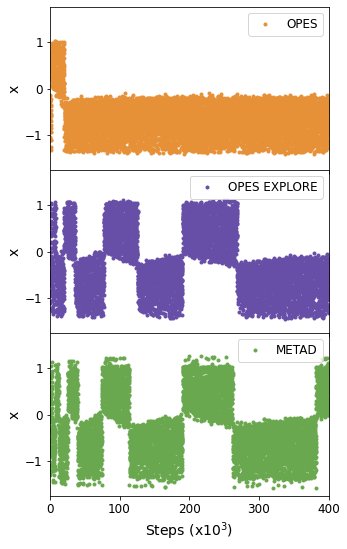

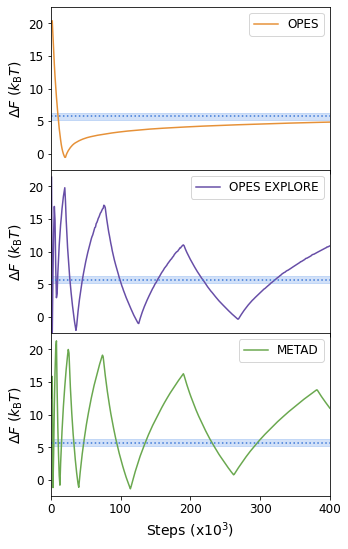

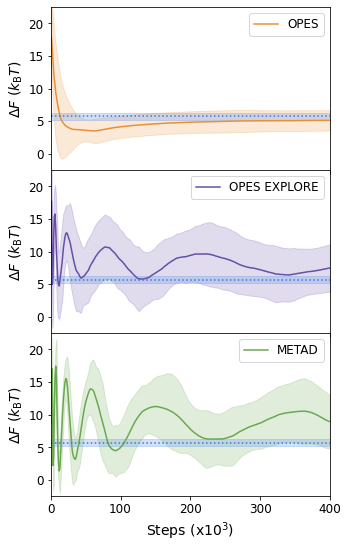

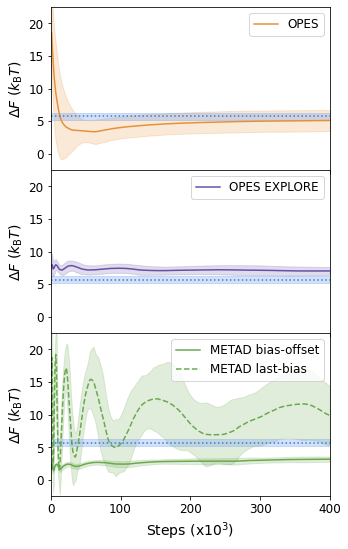

In [12]:
def create_tri_figure(my_plot, savename=None, **kwargs):
    methods = ['opes', 'explore', 'metad']
    fig = plt.figure()
    fig.set_size_inches((5, 9))
    gs = fig.add_gridspec(3, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    for i,method in enumerate(methods):
        my_plot(axs[i], method, **kwargs)
    if savename is not None:
        plt.savefig(savename, bbox_inches='tight', dpi=200)
    plt.show()

rep = 24
create_tri_figure(plot_colvar, savename='Mueller-colvar.pdf', rep=rep)
create_tri_figure(plot_deltaF, savename='Mueller-deltaF.pdf', rep=rep)
create_tri_figure(plot_av_deltaF, savename='Mueller-avDeltaF.pdf')
create_tri_figure(plot_av_deltaF, savename='Mueller-avDeltaF_rew.pdf', kind='rew')

In [13]:
def plot_av_deltaF2(ax, method, rep=rep, bck=None, kind='fes', ylim=ylim, legend=True):
    label, color = get_label_color(method)
    path = f'{root_path}{method}/'
    filename = f'av-deltaF_{kind}.dat'
    if bck is not None:
        filename = f'bck.{bck}.{filename}'
    time, av_deltaF, std_deltaF = loadfile(path+filename, unpack=True)
    time /= 0.005*500*1000 #convert to 1000 kernel depositions
    single_deltaF = loadfile(f'{path}{rep}/deltaF_{kind}.dat', usecols=(1,))
    ax.plot(time, single_deltaF, c=color, label='single run')
    ax.plot(time, av_deltaF, c=color, label='average', ls='dashed')
    ax.fill_between(time, av_deltaF-std_deltaF, av_deltaF+std_deltaF, alpha=0.2, color=color)
    ax.axhspan(DeltaF_1D-.5,DeltaF_1D+.5, color=l_blue, alpha=0.3)
    ax.set_xlim(0, max(time))
    ax.set_ylim(ylim)
    if legend:
        ax.legend(title=label, loc='upper right')
    ax.set_xlabel('Steps (x$10^3$)')
    ax.set_ylabel('$\Delta F$ ($k_\mathrm{B}T$)')

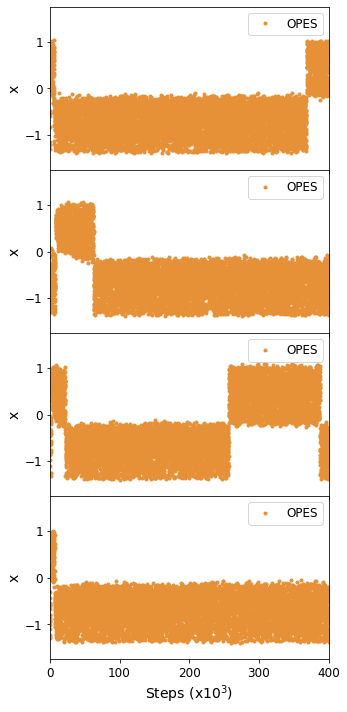

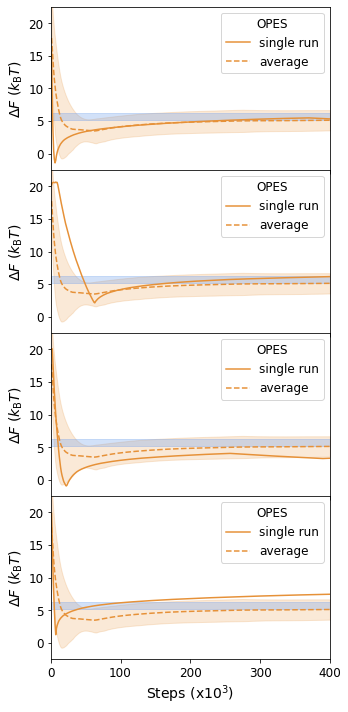

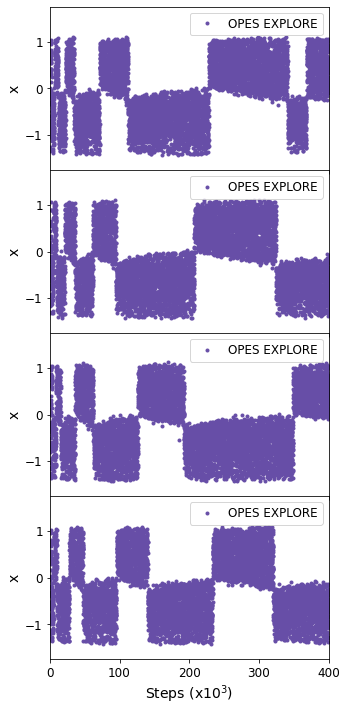

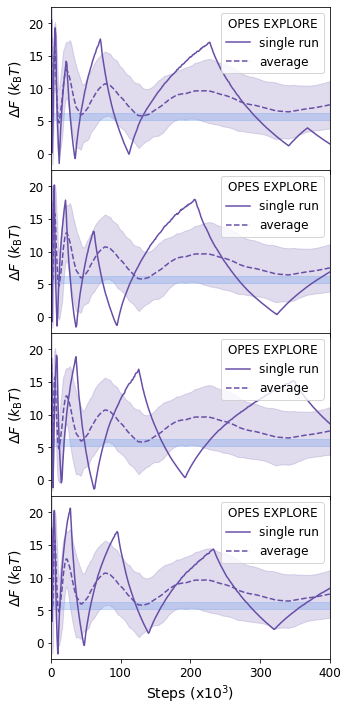

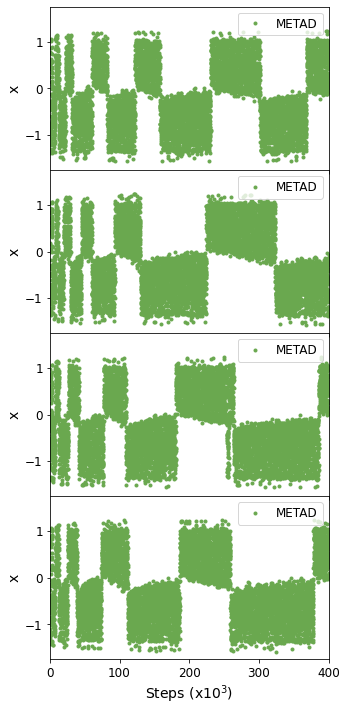

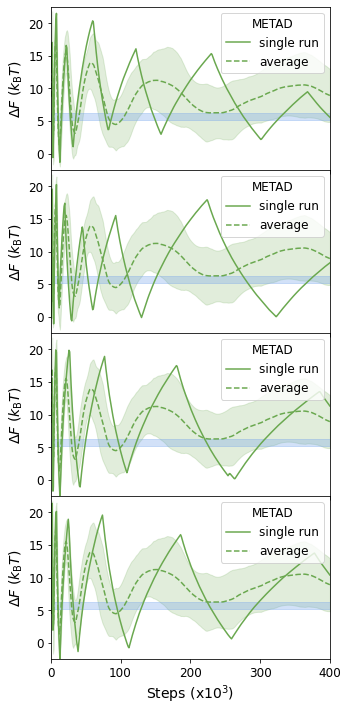

In [14]:
start = 10
# method = 'opes'#'metad'#'explore'#
def create_quad_figure(my_plot, method, savename=None, tot=4, start=start, **kwargs):
    fig = plt.figure()
    fig.set_size_inches((5, 3*tot))
    gs = fig.add_gridspec(tot, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    for i in range(tot):
        my_plot(axs[i], method, rep=start+i, **kwargs)
    if savename is None:
        plt.show()
    else:
        plt.savefig(savename, bbox_inches='tight', dpi=200)

methods = ['opes', 'explore', 'metad']
for method in methods:
    create_quad_figure(plot_colvar, method, f'Mueller-colvar_{method}.pdf')
    create_quad_figure(plot_av_deltaF2, method, f'Mueller-deltaF_{method}.pdf')

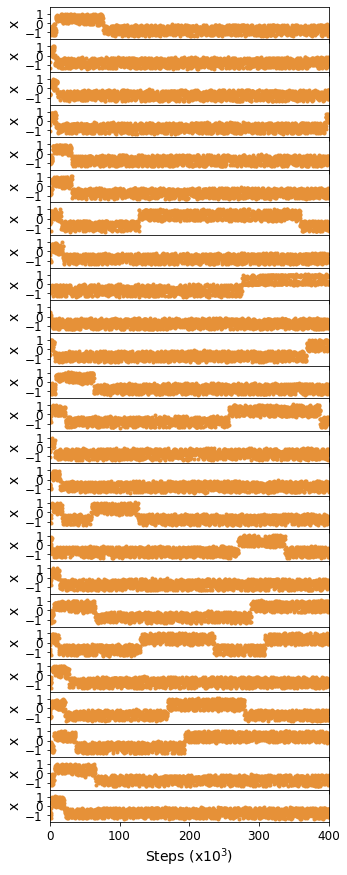

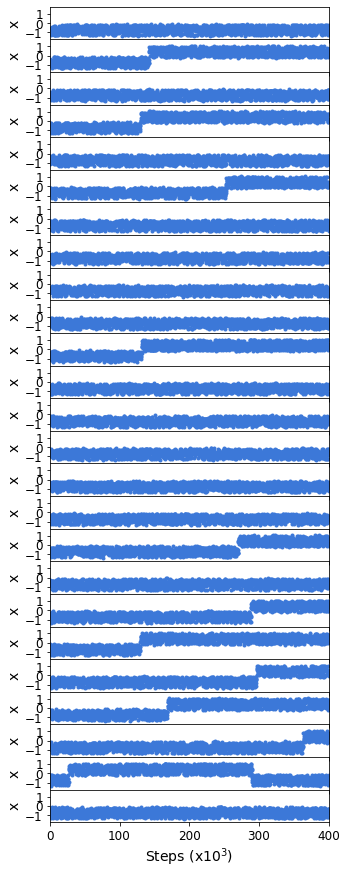

In [15]:
def create_allcolvar_figure(method, savename=None, tot=25, every=stride*5):
    fig = plt.figure()
    fig.set_size_inches((5, 15))
    gs = fig.add_gridspec(tot, hspace=0)
    axs = gs.subplots(sharex=True)
    for i in range(tot):
        plot_colvar(axs[i], method, rep=i, legend=False, every=every)
        print(f'plotting... {(1+i)/tot:.0%}  ', end='\r')
    if savename is None:
        plt.show()
    else:
        plt.savefig(savename, bbox_inches='tight', dpi=200)

for method in ['opes', 'static']:
    create_allcolvar_figure(method, f'Mueller-colvar_{method}-all.pdf')